# Machine Learning problem

In [1]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\ankan\\Anaconda3\\lib\\ntpath.py'>

In [2]:
os.chdir('C:\\Users\\ankan\\Desktop\\Stack')

<h2>  Data </h2>

<h3> Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3> Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

In [3]:
from wordcloud import WordCloud
import sqlite3
import re
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import seaborn as sns
import warnings
import csv
from PIL import Image

In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

In [6]:
data = pd.read_csv('data_100k.csv')

In [7]:
data.shape

(100000, 5)

In [8]:
data.head()

,Unnamed: 0,Id,Title,Body,Tags
0,0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,4,5,How to modify whois contact details?,<pre><code>function modify(.......)\r\n{\r\n ...,php api file-get-contents


<h3> Dropping Duplicates </h3>

In [9]:
data.drop_duplicates(subset={'Title', 'Body', 'Tags'}, 
                     keep='first', inplace=True)



In [10]:
data.shape

(99436, 5)

In [11]:
data['Question'] = data['Title'] + data["Body"]
data.head()

,Unnamed: 0,Id,Title,Body,Tags,Question
0,0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,How to check if an uploaded file is an image w...
1,1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,How can I prevent firefox from closing when I ...
2,2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,R Error Invalid type (list) for variable<p>I a...
3,3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,How do I replace special characters in a URL?<...
4,4,5,How to modify whois contact details?,<pre><code>function modify(.......)\r\n{\r\n ...,php api file-get-contents,How to modify whois contact details?<pre><code...


In [12]:
start = datetime.now()
data["tag_count"] = data["Tags"].apply(lambda text: len(text.split(" ")))

In [13]:
data.head()

,Unnamed: 0,Id,Title,Body,Tags,Question,tag_count
0,0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,How to check if an uploaded file is an image w...,5
1,1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,How can I prevent firefox from closing when I ...,1
2,2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,R Error Invalid type (list) for variable<p>I a...,3
3,3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,How do I replace special characters in a URL?<...,3
4,4,5,How to modify whois contact details?,<pre><code>function modify(.......)\r\n{\r\n ...,php api file-get-contents,How to modify whois contact details?<pre><code...,3


In [14]:
data.tag_count.value_counts()

3    28603
2    26384
4    19009
1    13784
5    11656
Name: tag_count, dtype: int64

In [15]:
data.to_csv('data_100k_no_dup.csv', index=True)

<h1>  Exploratory Data Analysis </h1>

In [16]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(data['Tags'])

In [17]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 99436
Number of unique tags : 18448


In [18]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.bash-profile', '.class-file', '.each', '.emf', '.hgtags', '.htaccess', '.htpasswd', '.mov', '.net']


In [19]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [20]:
freqs.shape

(18448,)

In [21]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm_100k.csv'):
    with open('tag_counts_dict_dtm.csv_100k', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv_100k", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,2
1,.bash-profile,1
2,.class-file,1
3,.each,6
4,.emf,2


In [22]:
tag_df.shape

(18448, 2)

<h3> Number of times a tag appeared </h3>

In [23]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

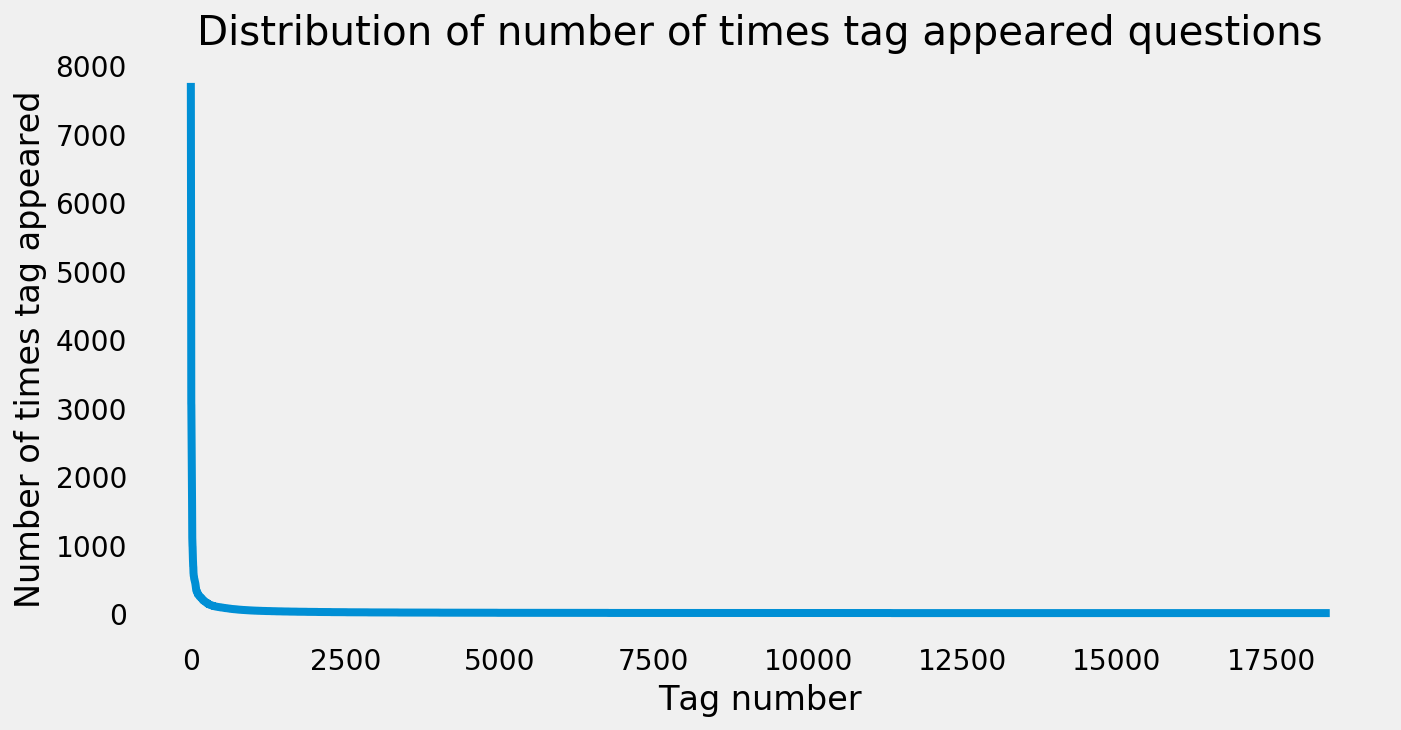

In [24]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

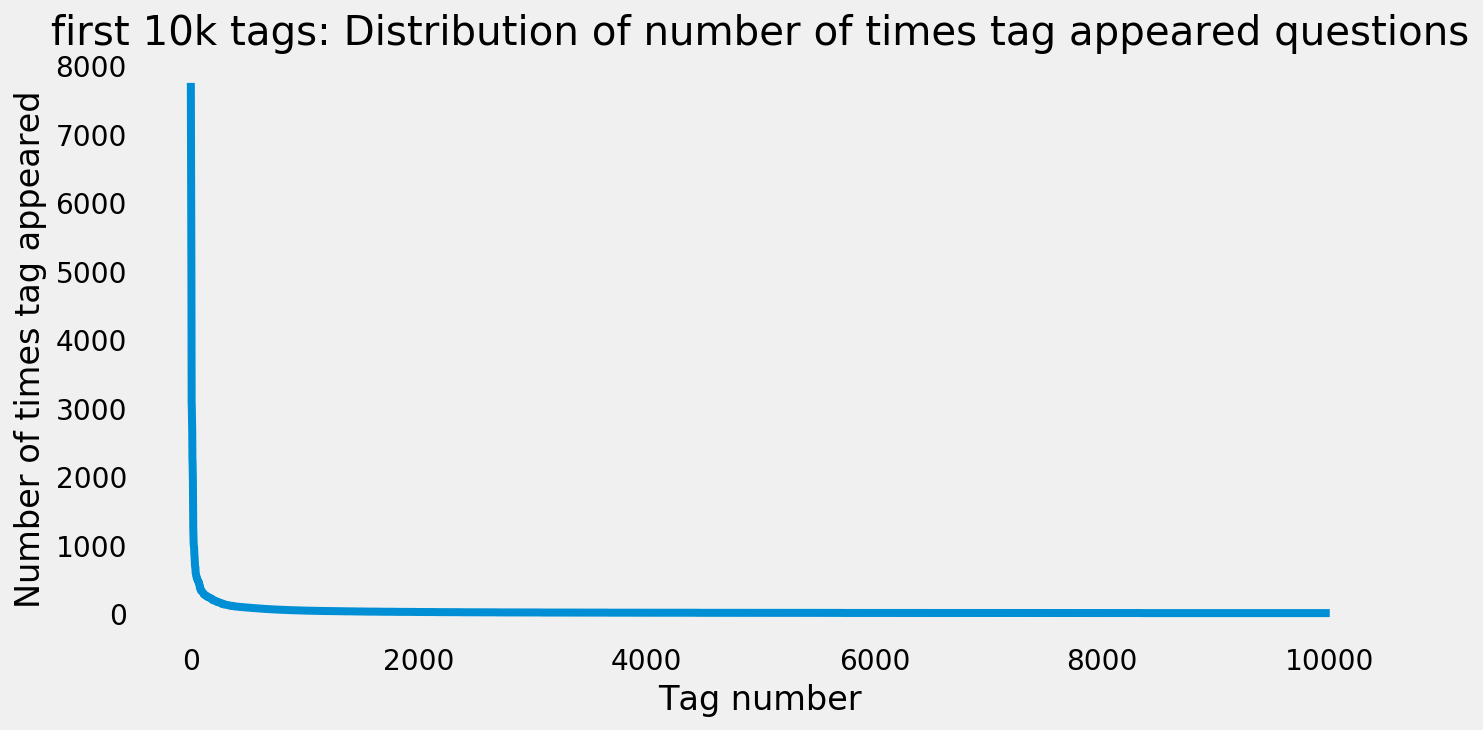

400 [7745  996  538  412  314  264  237  218  188  171  156  138  126  119
  110  104   97   93   90   85   83   79   75   73   69   66   64   60
   59   56   54   52   50   48   47   45   44   42   41   40   39   37
   37   36   35   34   33   32   32   31   31   30   29   29   28   28
   27   27   26   26   25   25   24   24   23   23   23   22   22   21
   21   21   20   20   20   20   19   19   19   18   18   18   18   17
   17   17   17   16   16   16   16   15   15   15   15   15   14   14
   14   14   14   13   13   13   13   13   13   13   12   12   12   12
   12   12   12   11   11   11   11   11   11   11   11   11   10   10
   10   10   10   10   10   10   10   10   10    9    9    9    9    9
    9    9    9    9    9    9    9    8    8    8    8    8    8    8
    8    8    8    8    8    8    8    7    7    7    7    7    7    7
    7    7    7    7    7    7    7    7    7    7    7    6    6    6
    6    6    6    6    6    6    6    6    6    6    6    6    6    6
  

In [25]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

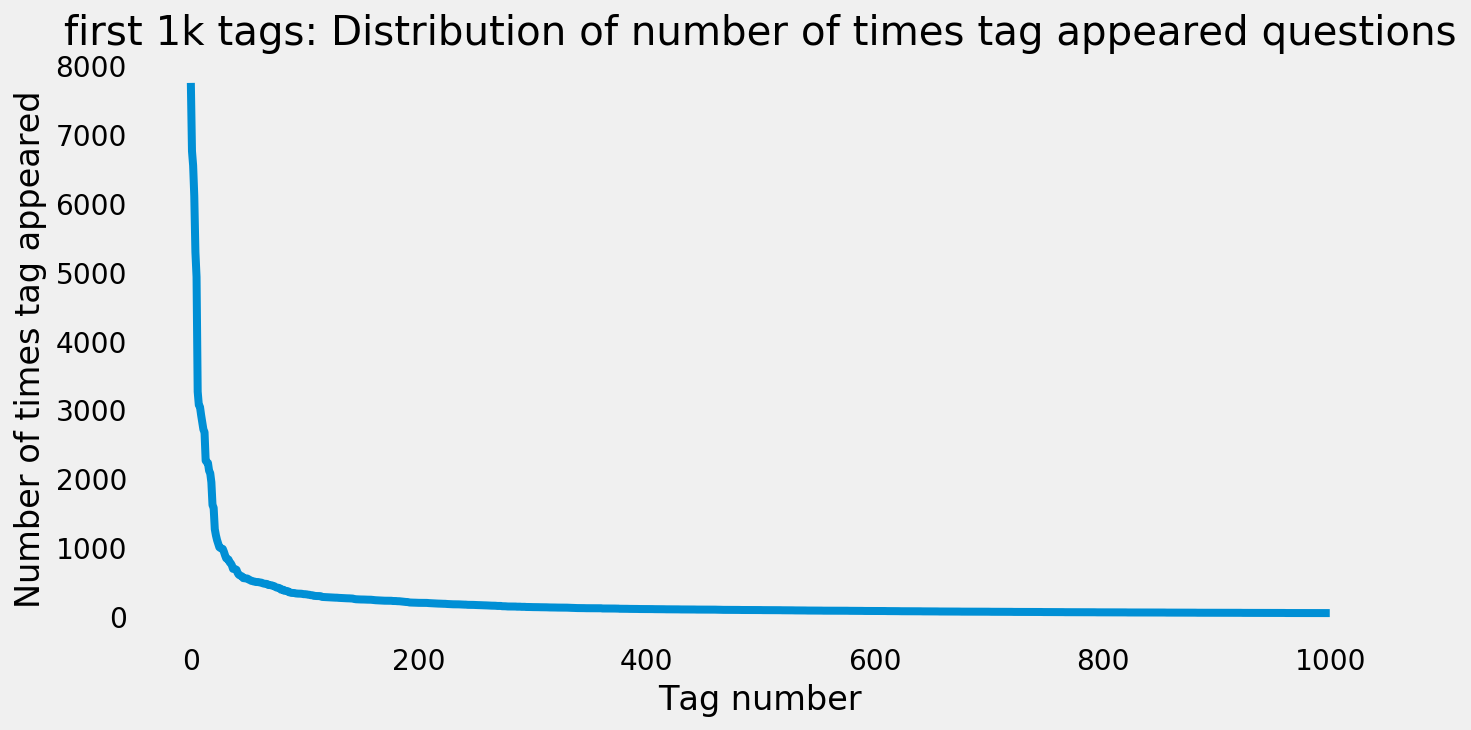

200 [7745 4925 2818 2222 1570  996  879  763  669  571  538  499  486  465
  444  412  379  357  331  322  314  300  287  274  268  264  260  255
  252  240  237  234  229  224  219  218  214  207  200  191  188  187
  183  178  175  171  167  166  162  159  156  153  150  147  143  138
  135  134  130  128  126  125  123  121  120  119  118  115  112  111
  110  109  109  106  105  104  102  100   99   98   97   97   96   95
   94   93   92   92   91   90   90   89   89   87   86   85   85   84
   84   83   83   82   81   81   80   79   78   77   76   76   75   74
   74   74   73   73   72   72   70   70   69   69   68   68   67   66
   65   65   65   64   64   63   62   61   61   60   60   59   59   59
   59   58   58   57   57   56   56   56   55   55   54   54   53   53
   52   52   51   51   51   50   50   50   49   49   49   48   48   47
   47   47   47   46   46   46   45   45   45   44   44   44   44   44
   43   43   43   42   42   42   42   41   41   41   40   40   40   40
  

In [26]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

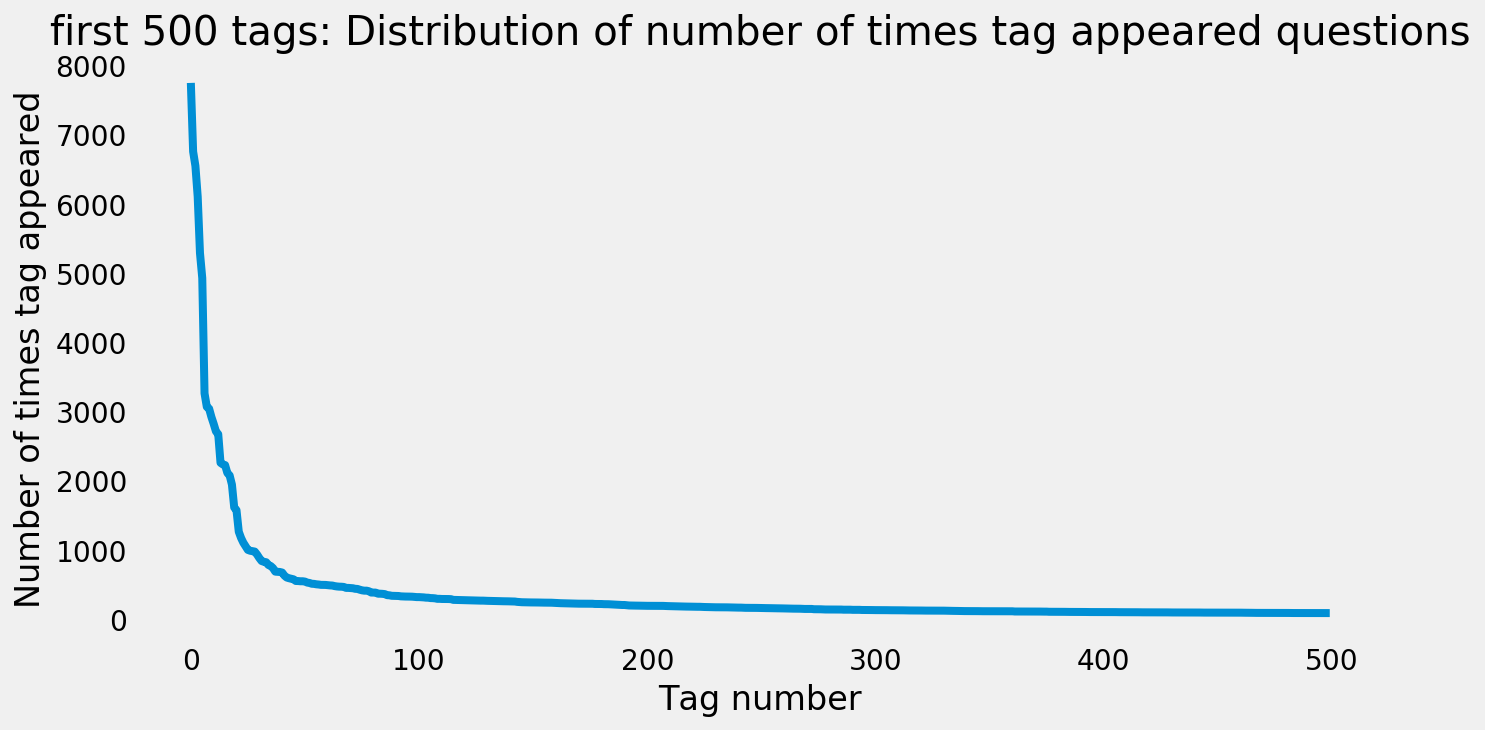

100 [7745 4925 2818 2222 1570  996  879  763  669  571  538  499  486  465
  444  412  379  357  331  322  314  300  287  274  268  264  260  255
  252  240  237  234  229  224  219  218  214  207  200  191  188  187
  183  178  175  171  167  166  162  159  156  153  150  147  143  138
  135  134  130  128  126  125  123  121  120  119  118  115  112  111
  110  109  109  106  105  104  102  100   99   98   97   97   96   95
   94   93   92   92   91   90   90   89   89   87   86   85   85   84
   84   83]


In [27]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

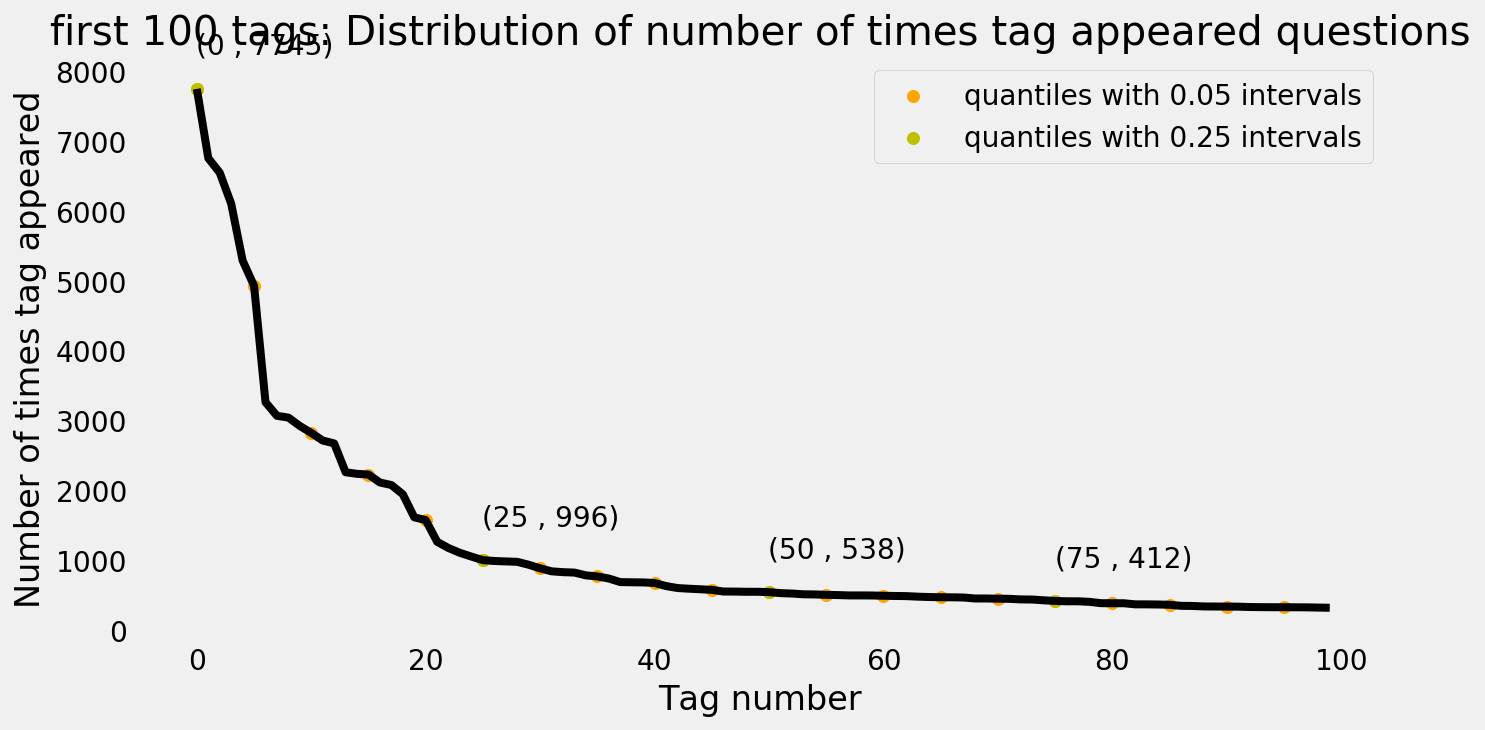

20 [7745 4925 2818 2222 1570  996  879  763  669  571  538  499  486  465
  444  412  379  357  331  322]


In [28]:
plt.plot(tag_counts[0:100], c='black')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='y', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [29]:
# Store tags greater than 10K in one list
lst_tags_gt_100 = tag_df[tag_df.Counts>100].Tags
#Print the length of the list
print ('{} Tags are used more than 100 times'.format(len(lst_tags_gt_100)))
# Store tags greater than 100K in one list
lst_tags_gt_7k = tag_df[tag_df.Counts>7000].Tags
#Print the length of the list.
print ('{} Tags are used more than 7000 times'.format(len(lst_tags_gt_7k)))

384 Tags are used more than 100 times
1 Tags are used more than 7000 times


In [30]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 99436 datapoints.
[5, 1, 3, 3, 3]


In [31]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.883030


<h3> Most Frequent Tags </h3>

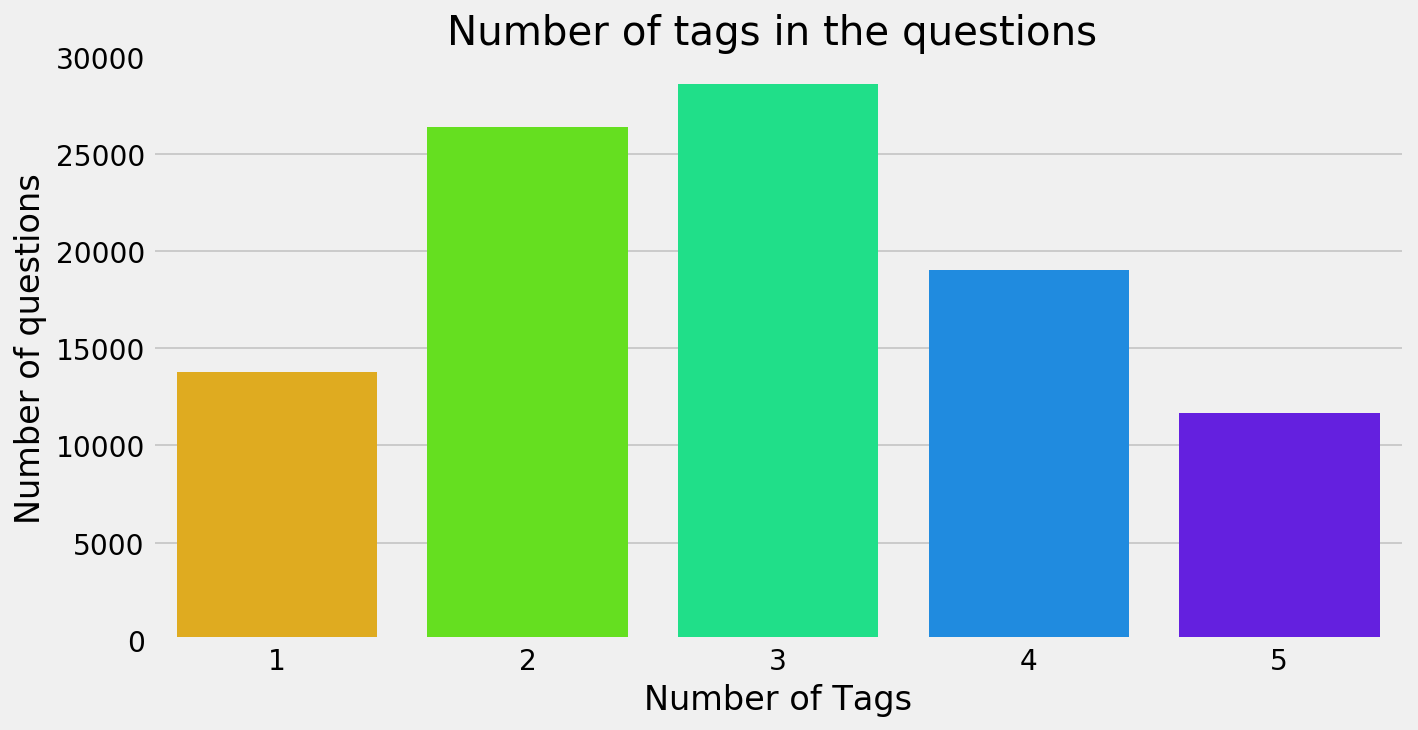

In [32]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

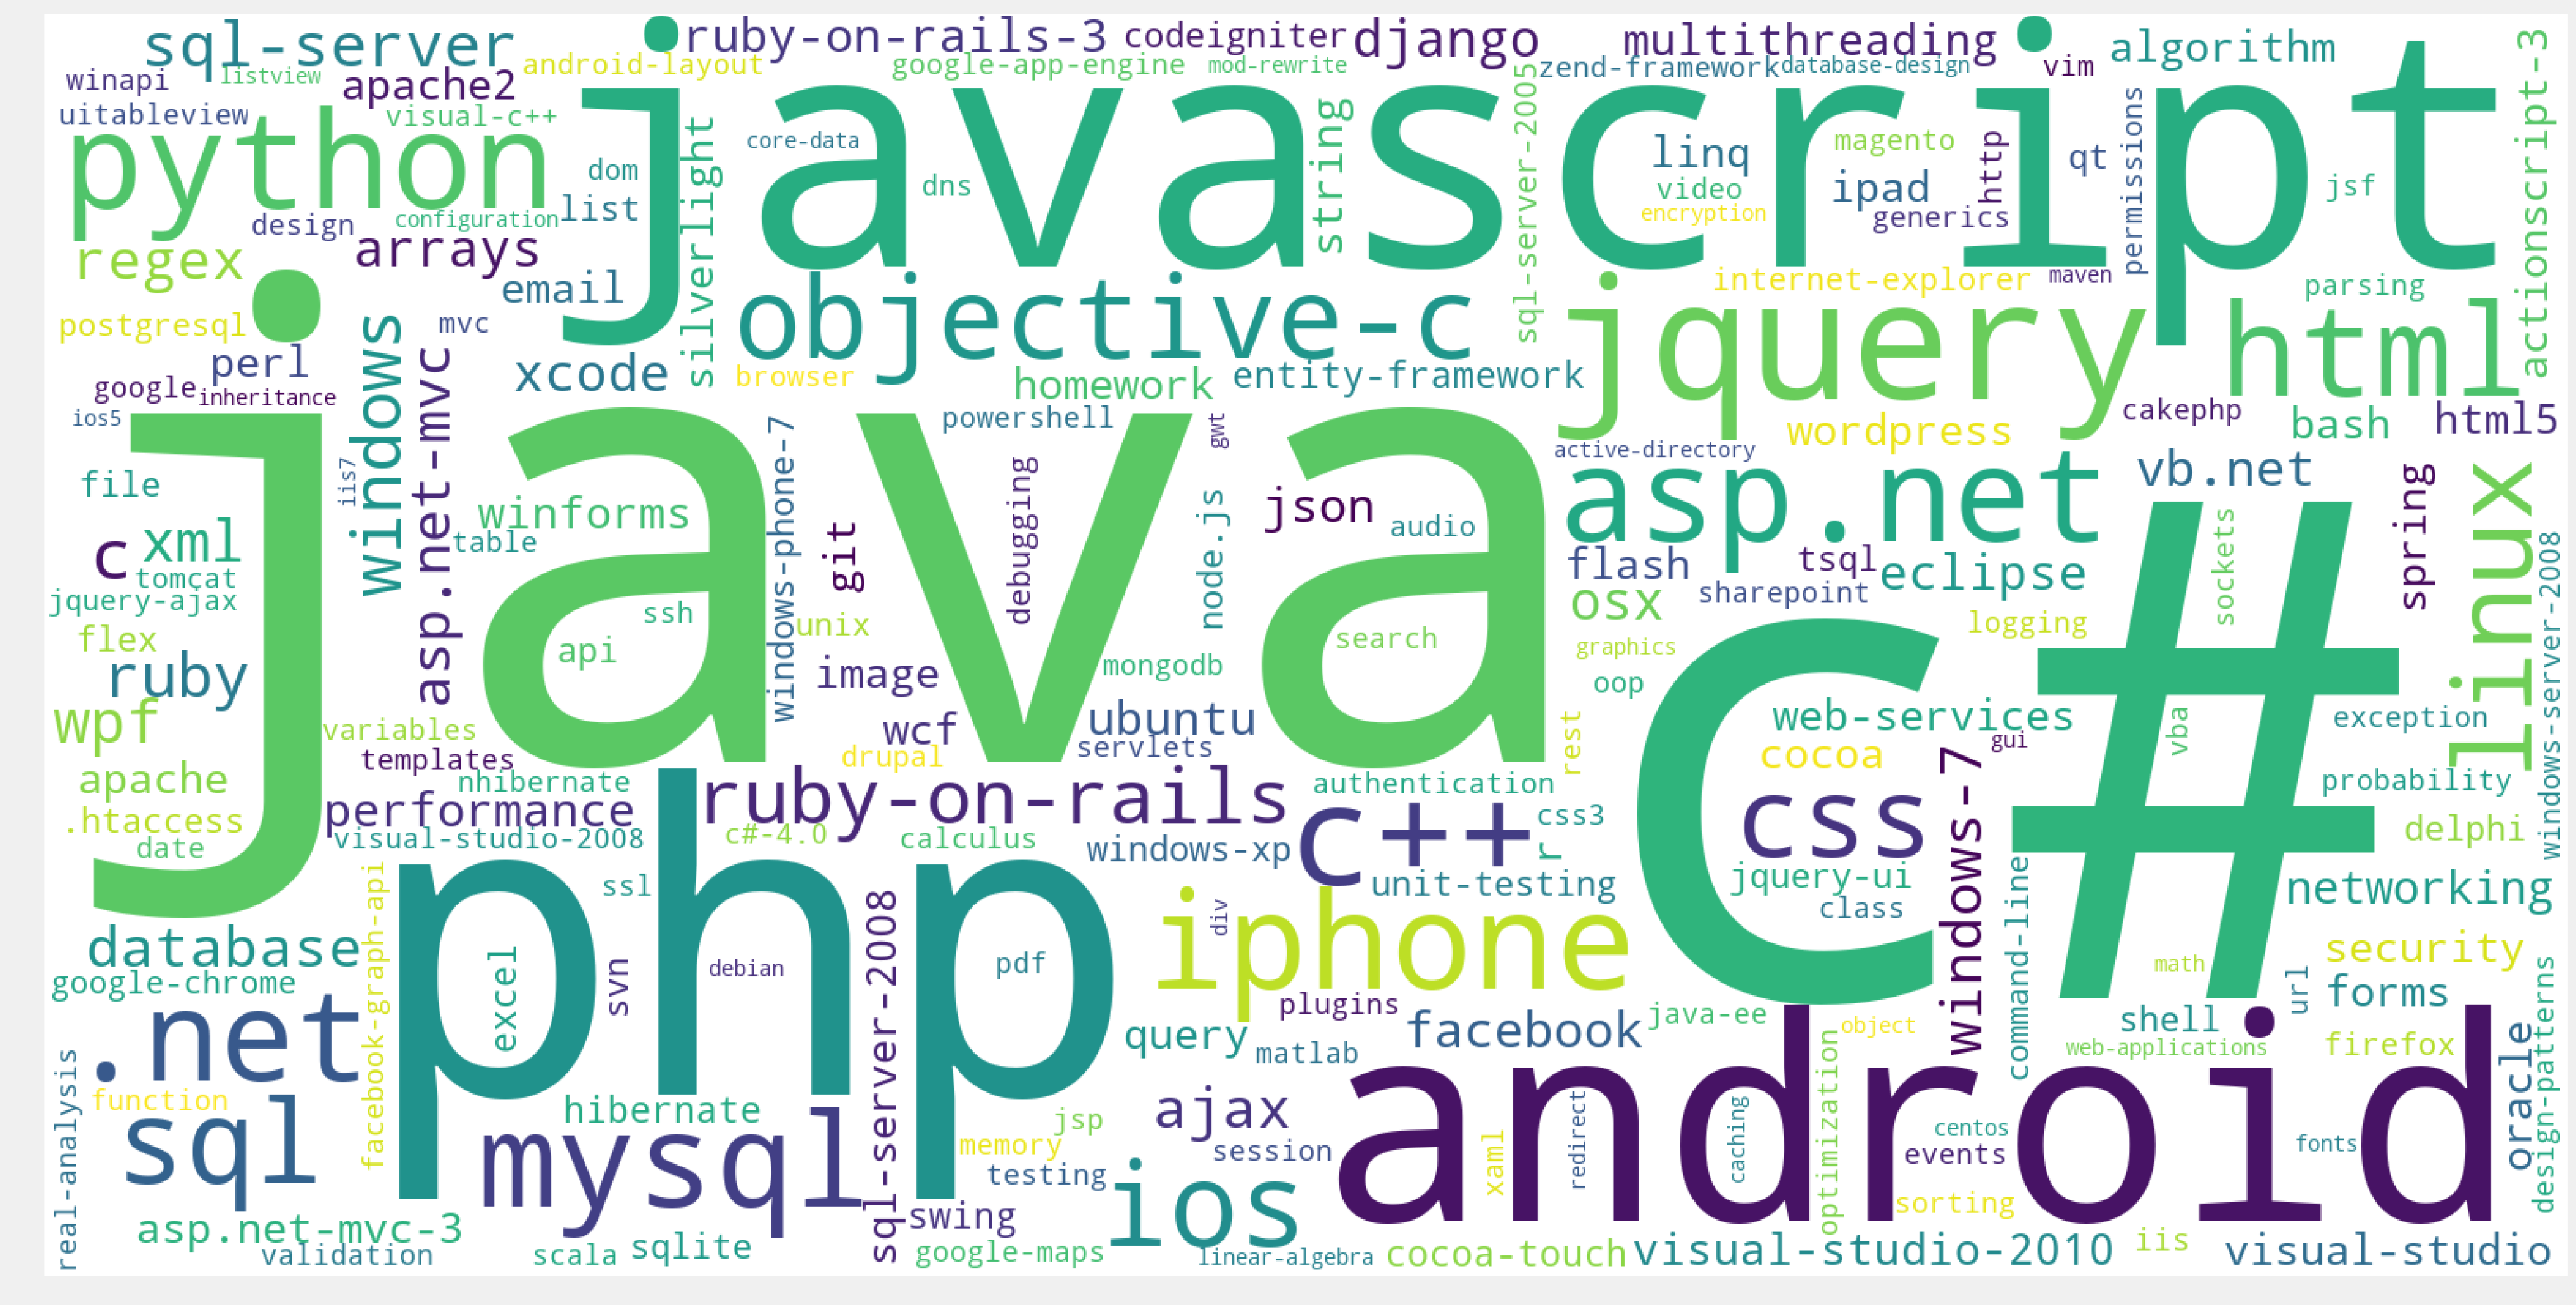

Time taken to run this cell : 0:00:05.765264


In [33]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='white',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

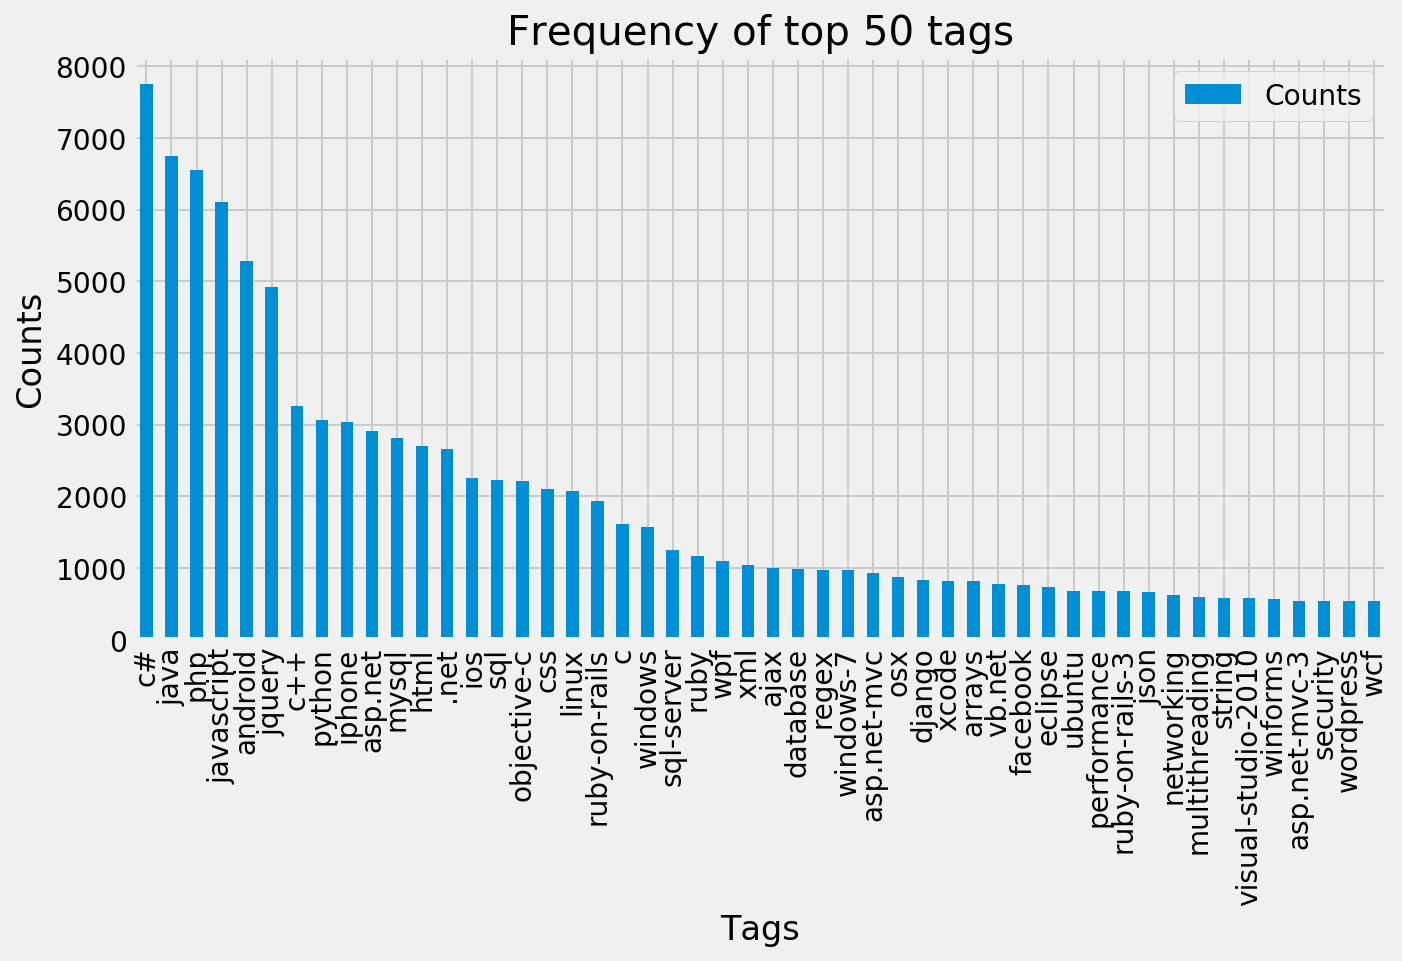

In [34]:
i=np.arange(50)
tag_df_sorted.head(50).plot(kind='bar')
plt.title('Frequency of top 50 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Most frequent tag (i.e. c#) is used 331505 times.
2. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.
3. 384 Tags are used more than 100 times
4. 1 Tags are used more than 7000 times
5. Maximum number of tags per question: 5
6. Minimum number of tags per question: 1
7. Avg. number of tags per question: 2.883030
8. Most of the questions are having 2 or 3 tags

<h2> Cleaning and preprocessing of Questions </h2>

<ol> 
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [35]:
data['Question'][4]

'How to modify whois contact details?<pre><code>function modify(.......)\r\n{\r\n  $mcontact = file_get_contents( "https://test.httpapi.com/api/contacts/modify.json?auth-userid=$uid&amp;auth-password=$pass&amp;contact-id=$cid&amp;name=$name &amp;company=$company&amp;email=$email&amp;address-line-1=$street&amp;city=$city&amp;country=$country&amp;zipcode=$pincode&amp;phone-cc=$countryCodeList[$phc]&amp;phone=$phone" );\r\n\r\n  $mdetails = json_decode( $mcontact, true );\r\n\r\n  return $mdetails;\r\n}\r\n</code></pre>\r\n\r\n<p>using this modify function, displays warning mesage\r\n</p>\r\n\r\n<pre class="lang-none prettyprint-override"><code>Warning: file_get_contents(https://...@hihfg.com&amp;address-line-1=3,dfgdf,fgdf&amp;city=dfgfd&amp;country=India&amp;zipcode=641005&amp;phone-cc=91&amp;phone=756657) \r\n  [function.file-get-contents]: failed to open stream: HTTP request failed!\r\n  HTTP/1.0 400 Bad request in /home/gfdgfd/public_html/new_one/customer/account/class.whois.php\r\n 

In [36]:
import nltk
from nltk import PorterStemmer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
i=0;
for sent in data['Question'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

0
How to check if an uploaded file is an image without mime type?<p>I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.</p>

<p>Is there a way to check if the uploaded file is an image apart from checking the file extension using PHP?</p>



In [38]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext



stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


def clean_body(text):
    regex = r"href=\s*''\s*http\s*.*?''"
    return re.sub(regex, '', text)

def stemIt(text):
    ct = []
    for each in word_tokenize(text):
        ct.append(stemmer.stem(each))
    return ' '.join(ct)

In [39]:
data['Question'] = data['Question'].apply(striphtml)
data['Question'] = data['Question'].apply(cleanpunc).str.lower()


In [40]:
data['Question'][98099]

'xsd-generated class doesnt include xinclude content after deserialization im using the xmlserializer class to deserialize a xsd exe-generated class from an xml document   the xml document has two xinclude tags to other xml documents   after deserialization  the xinclude content is missing  \r\n\r\n does anyone know if the  net xml parsers handle xinclude content  if not  any suggested workarounds \r\n\r\n thanks  \r\n'

In [41]:
data['Question'][4]

'how to modify whois contact details  function modify         \r\n{\r\n  $mcontact = file_get_contents  https:  test httpapi com api contacts modify jsonauth-userid=$uid&amp;auth-password=$pass&amp;contact-id=$cid&amp;name=$name &amp;company=$company&amp;email=$email&amp;address-line-1=$street&amp;city=$city&amp;country=$country&amp;zipcode=$pincode&amp;phone-cc=$countrycodelist[$phc]&amp;phone=$phone  ;\r\n\r\n  $mdetails = json_decode  $mcontact  true  ;\r\n\r\n  return $mdetails;\r\n}\r\n  \r\n\r\n using this modify function  displays warning mesage\r\n \r\n\r\n  warning: file_get_contents https:     @hihfg com&amp;address-line-1=3 dfgdf fgdf&amp;city=dfgfd&amp;country=india&amp;zipcode=641005&amp;phone-cc=91&amp;phone=756657  \r\n  [function file-get-contents]: failed to open stream: http request failed\r\n  http 1 0 400 bad request in  home gfdgfd public_html new_one customer account class whois php\r\n  on line 49\r\n  \r\n\r\n please help me  modify contact details   \r\n'

In [42]:
data['Question'] = data['Question'].apply(clean_body)

In [43]:
data['Question'][4]

'how to modify whois contact details  function modify         \r\n{\r\n  $mcontact = file_get_contents  https:  test httpapi com api contacts modify jsonauth-userid=$uid&amp;auth-password=$pass&amp;contact-id=$cid&amp;name=$name &amp;company=$company&amp;email=$email&amp;address-line-1=$street&amp;city=$city&amp;country=$country&amp;zipcode=$pincode&amp;phone-cc=$countrycodelist[$phc]&amp;phone=$phone  ;\r\n\r\n  $mdetails = json_decode  $mcontact  true  ;\r\n\r\n  return $mdetails;\r\n}\r\n  \r\n\r\n using this modify function  displays warning mesage\r\n \r\n\r\n  warning: file_get_contents https:     @hihfg com&amp;address-line-1=3 dfgdf fgdf&amp;city=dfgfd&amp;country=india&amp;zipcode=641005&amp;phone-cc=91&amp;phone=756657  \r\n  [function file-get-contents]: failed to open stream: http request failed\r\n  http 1 0 400 bad request in  home gfdgfd public_html new_one customer account class whois php\r\n  on line 49\r\n  \r\n\r\n please help me  modify contact details   \r\n'

In [45]:
stemmer = SnowballStemmer("english")

In [46]:
data['Question'] = data['Question'].apply(stemIt)

In [48]:
data = data.drop(['Id', 'Unnamed: 0'], axis=1)
data.head()

,Title,Body,Tags,Question,tag_count
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,how to check if an upload file is an imag with...,5
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,how can i prevent firefox from close when i pr...,1
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,r error invalid type list for variabl i am imp...,3
3,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,how do i replac special charact in a url this ...,3
4,How to modify whois contact details?,<pre><code>function modify(.......)\r\n{\r\n ...,php api file-get-contents,how to modifi whoi contact detail function mod...,3


__Saving the preprocessed Data as a csv file__

In [49]:
data.to_csv('data_100k_finally_filtered.csv', index=True)